# What is the most profitable way to sell cars online?

- Fair price for each model of car
- Saturation in the market
- Average cost per car brand

The Vehicle Manufacturer with the largest number of 
- White Vehicles listed is Ford with 5468 listings.
- Chevrolet with 3110 White Vehicles Listed.
- Toyota with 1167 White Vehicles Listed. (Japanese Owned)

In [339]:
# dependencies
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [340]:
vehicle_listing_data = os.path.join("..", "output_data", "vehicles_cleaned.csv")
vehicle_listing_df = pd.read_csv(vehicle_listing_data)

#vehicle_sold_data = os.path.join("..", "output_data", "used_cars_sold_cleaned.csv")
#vehicle_sold_df = pd.read_csv(vehicle_sold_data)
vehicle_listing_df.head()

,Unnamed: 0,id,region,price,year,manufacturer,model,condition,cylinders,fuel,...,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date
0,0,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,...,clean,automatic,rwd,full-size,truck,black,al,32.592000,-85.51890,2021-05-03T14:02:03-0500
1,1,7314560853,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,...,clean,automatic,4wd,full-size,pickup,blue,al,32.547500,-85.46820,2021-04-29T17:19:18-0500
2,2,7313406529,auburn,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,...,clean,automatic,fwd,full-size,mini-van,silver,al,32.628739,-85.46182,2021-04-27T12:20:01-0500
3,3,7312847466,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,...,clean,manual,rwd,full-size,truck,white,al,32.630400,-85.40160,2021-04-26T11:15:36-0500
4,4,7312144944,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,...,rebuilt,automatic,rwd,mid-size,sedan,grey,al,32.822400,-85.77040,2021-04-24T18:39:59-0500


In [341]:
vehicle_listing_df = vehicle_listing_df.loc[vehicle_listing_df["price"] > 1]
vehicle_listing_df = vehicle_listing_df[vehicle_listing_df.groupby("manufacturer").price.\
      transform(lambda x : (x<x.quantile(0.95))&(x>(x.quantile(0.05)))).eq(1)]

vehicle_listing_df.max()

Unnamed: 0                         71662
id                            7317101084
region            zanesville / cambridge
price                             120000
year                              2022.0
manufacturer                       volvo
model                              ♿ vmi
condition                        salvage
cylinders                          other
fuel                               other
odometer                       9999999.0
title_status                     salvage
transmission                       other
drive                                rwd
size                         sub-compact
type                               wagon
paint_color                       yellow
state                                 wy
lat                            82.252826
long                            139.6917
posting_date    2021-05-04T23:59:45-0400
dtype: object

In [342]:
# Calculating the number of cars listed
num_cars = vehicle_listing_df.groupby("manufacturer")["Unnamed: 0"].count()
num_cars = num_cars.sort_values(ascending=False)
num_cars.rename("count").reset_index()

,manufacturer,count
0,ford,11688
1,chevrolet,8614
2,toyota,5512
3,honda,4006
4,nissan,3327
5,gmc,2392
6,jeep,2374
7,ram,2212
8,dodge,1858
9,bmw,1689


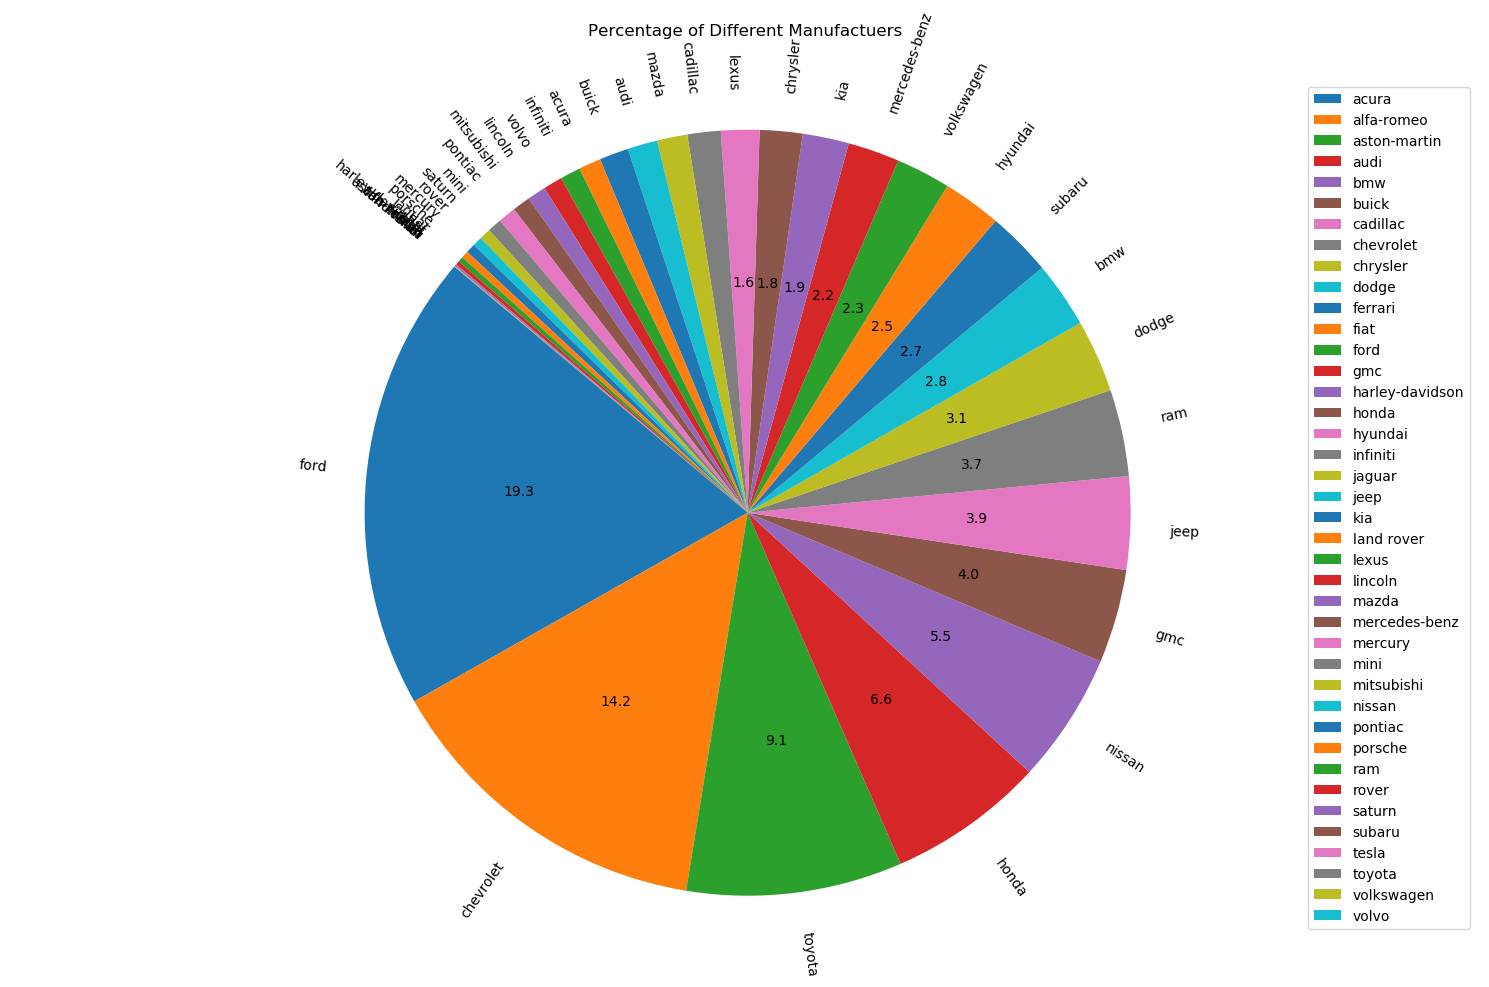

In [343]:
num_cars.plot(kind="pie", rotatelabels=18, figsize=(15,10), autopct=lambda p: format(p, ".1f") if p > 1.5 else None,
             shadow = False, startangle = 140, textprops={'fontsize': 10})

plt.title("Percentage of Different Manufactuers", pad = 40)
plt.ylabel("")

plt.legend(labels, loc = "lower right")

plt.axis("equal")
plt.tight_layout()

# Observation
* It can be seen that fords and chervolet are the most listed cars, with them making up 19.1% and 14.5% of the listed used cars 

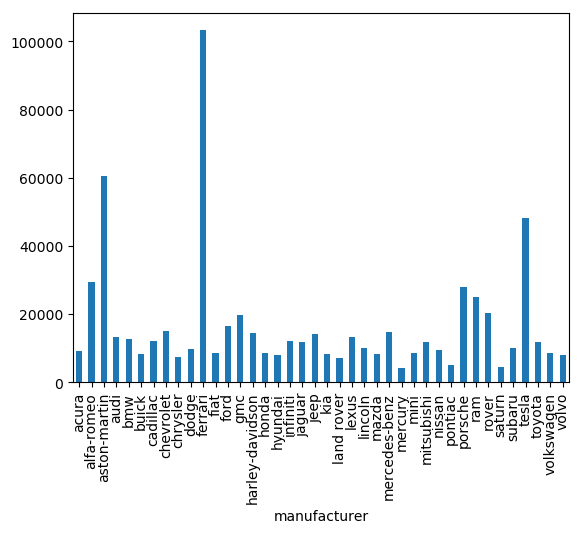

In [344]:
# Average price per car type
average_listing_price = vehicle_listing_df.groupby(["manufacturer"])["price"].mean().sort_index()
average_listing_price.plot.bar()

In [345]:
average_listing_price[["ford", "chevrolet", "toyota"]].reset_index()

,manufacturer,price
0,ford,16592.743241
1,chevrolet,14898.715695
2,toyota,11673.227141


In [346]:
# Top 5 average costing cars
top_avg_list_price = average_listing_price.sort_values(ascending=False).reset_index()
top_avg_list_price.rename(columns = {"price":"average price"}, inplace=True)
top_avg_list_price.head(5)

,manufacturer,average price
0,ferrari,103273.888889
1,aston-martin,60475.000000
2,tesla,48278.384615
3,alfa-romeo,29511.583333
4,porsche,27808.241758


In [347]:
# Bottom 5 average costing cars
bot_avg_list_price = average_listing_price.sort_values(ascending=True).reset_index()
bot_avg_list_price.rename(columns = {"price":"average price"}, inplace=True)
bot_avg_list_price.head(5)

,manufacturer,average price
0,mercury,4251.185185
1,saturn,4421.137931
2,pontiac,5092.920354
3,land rover,6997.500000
4,chrysler,7315.075938


# Observation
* We can observe that the though ford, chevrolet and toyota have the highest number of listings, they still have a relatively high average price. This indicates that they it has a good supply and demand for these cars.

# Finding volatility
* Since we will be sourcing used cars, we need to be buy them for as cheap as possible and sell them for as high as possible to make the biggest margin

D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1395: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


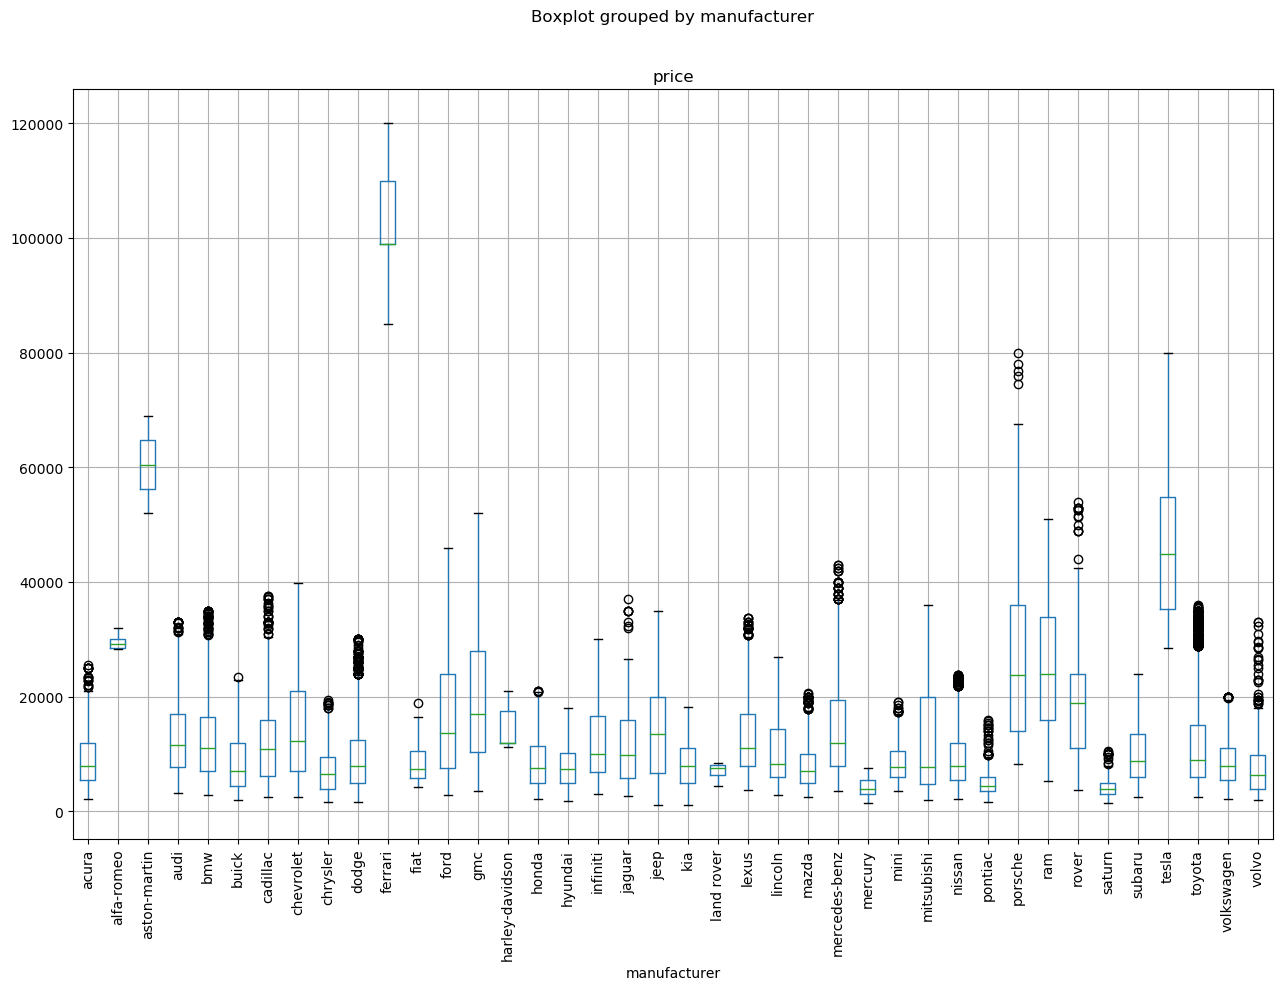

In [348]:
iqr = vehicle_listing_df.boxplot(column="price", by="manufacturer", rot=90, figsize=(15,10))

In [355]:
# iqr = vehicle_listing_df.quantile([0.75, 0.25]).groupby("manufacturer")["price"].agg(np.substract.reduce)

grouper = vehicle_listing_df.groupby("manufacturer")
q1, q3 = grouper.quantile(0.25), grouper.quantile(0.75)
iqr = q3 - q1
iqr = iqr.rename(columns={"price": "IQR"})

iqr[]
#groupby("manufacturer")[["price"]].agg(iqr)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  after removing the cwd from sys.path.


,Unnamed: 0,id,IQR,year,odometer,lat,long
manufacturer,,,,,,,
acura,38151.50,6328796.25,6497.00,6.00,65478.50,5.459786,33.034932
alfa-romeo,52646.00,3840300.25,1488.75,0.00,6578.00,1.982423,33.450984
aston-martin,1249.00,2308327.00,8475.00,0.50,10874.00,5.601206,4.413984
audi,37119.25,6291558.50,9307.50,6.00,53464.25,6.526796,28.665920
bmw,38162.00,5599800.00,9495.00,6.00,58334.00,7.404053,32.800585
buick,30616.25,6944260.25,7589.75,8.00,66642.50,5.919406,16.694352
cadillac,32316.00,6939036.75,9750.00,7.00,67905.25,7.918325,17.621025
chevrolet,32052.25,7068645.75,14010.00,8.00,77855.25,7.027957,17.144274
chrysler,31750.00,6120690.00,5570.00,7.00,54898.00,7.123006,16.924200
